### 1. Wine Dataset: Logistic Regression

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine_df = pd.read_csv("winequalityN.csv")

In [3]:
wine_df

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
4          0.40      9.9        6  
...         ...      ...      ...  
6492       0.58     10.5        5  
6493        NaN     11.2        6  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[6497 rows x 13 columns]

In [4]:
wine_df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

dropping quality values with very low samples

In [5]:
wine_df.drop(wine_df.loc[wine_df['quality']==9].index, inplace = True)
wine_df.drop(wine_df.loc[wine_df['quality']==3].index, inplace = True)

In [6]:
wine_df['type'].value_counts()

white    4873
red      1589
Name: type, dtype: int64

In [7]:
wine_df.shape

(6462, 13)

In [8]:
wine_df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [9]:
wine_df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6452.000000       6454.000000  6459.000000     6460.000000   
mean        7.213461          0.338899     0.318845        5.446765   
std         1.293995          0.163036     0.145144        4.759349   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.330000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6460.000000          6462.000000           6462.000000  6462.000000   
mean      0.055966            30.482745            115.715181     0.994694   
std       0.034845            17.324086             56.170743     0.002998   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             78.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994885   
75%       0.065000            41.000000            156.000000     0.996987   
max       0.611000           138.500000            344.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6453.000000  6458.000000  6462.000000  6462.000000  
mean      3.218143     0.531381    10.491780     5.829000  
std       0.160493     0.148935     1.192298     0.849633  
min       2.720000     0.220000     8.000000     4.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [10]:
wine_df.shape

(6462, 13)

In [11]:
wine_df['type'].value_counts()

white    4873
red      1589
Name: type, dtype: int64

In [12]:
wine_df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

<AxesSubplot:>

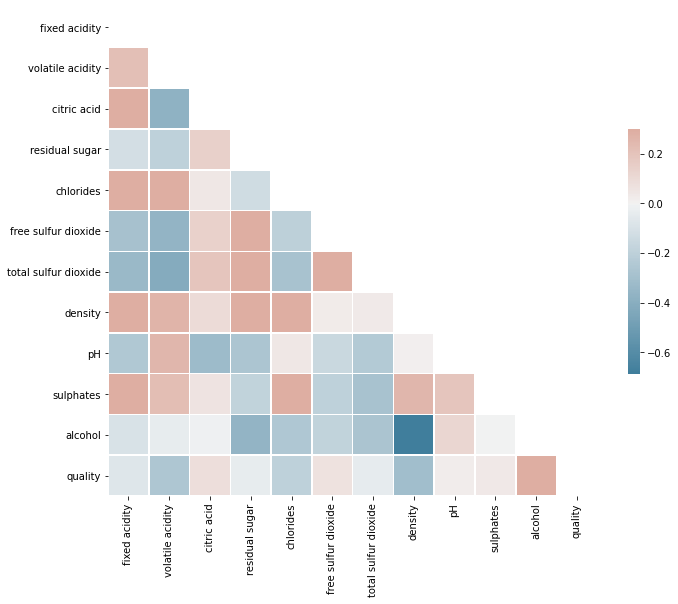

In [13]:
corr = wine_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5})

### train - test split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df_train, df_test = train_test_split(wine_df, test_size = 0.2, random_state = 42)

In [16]:
df_train.shape

(5169, 13)

In [17]:
df_test.shape

(1293, 13)

### EDA

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

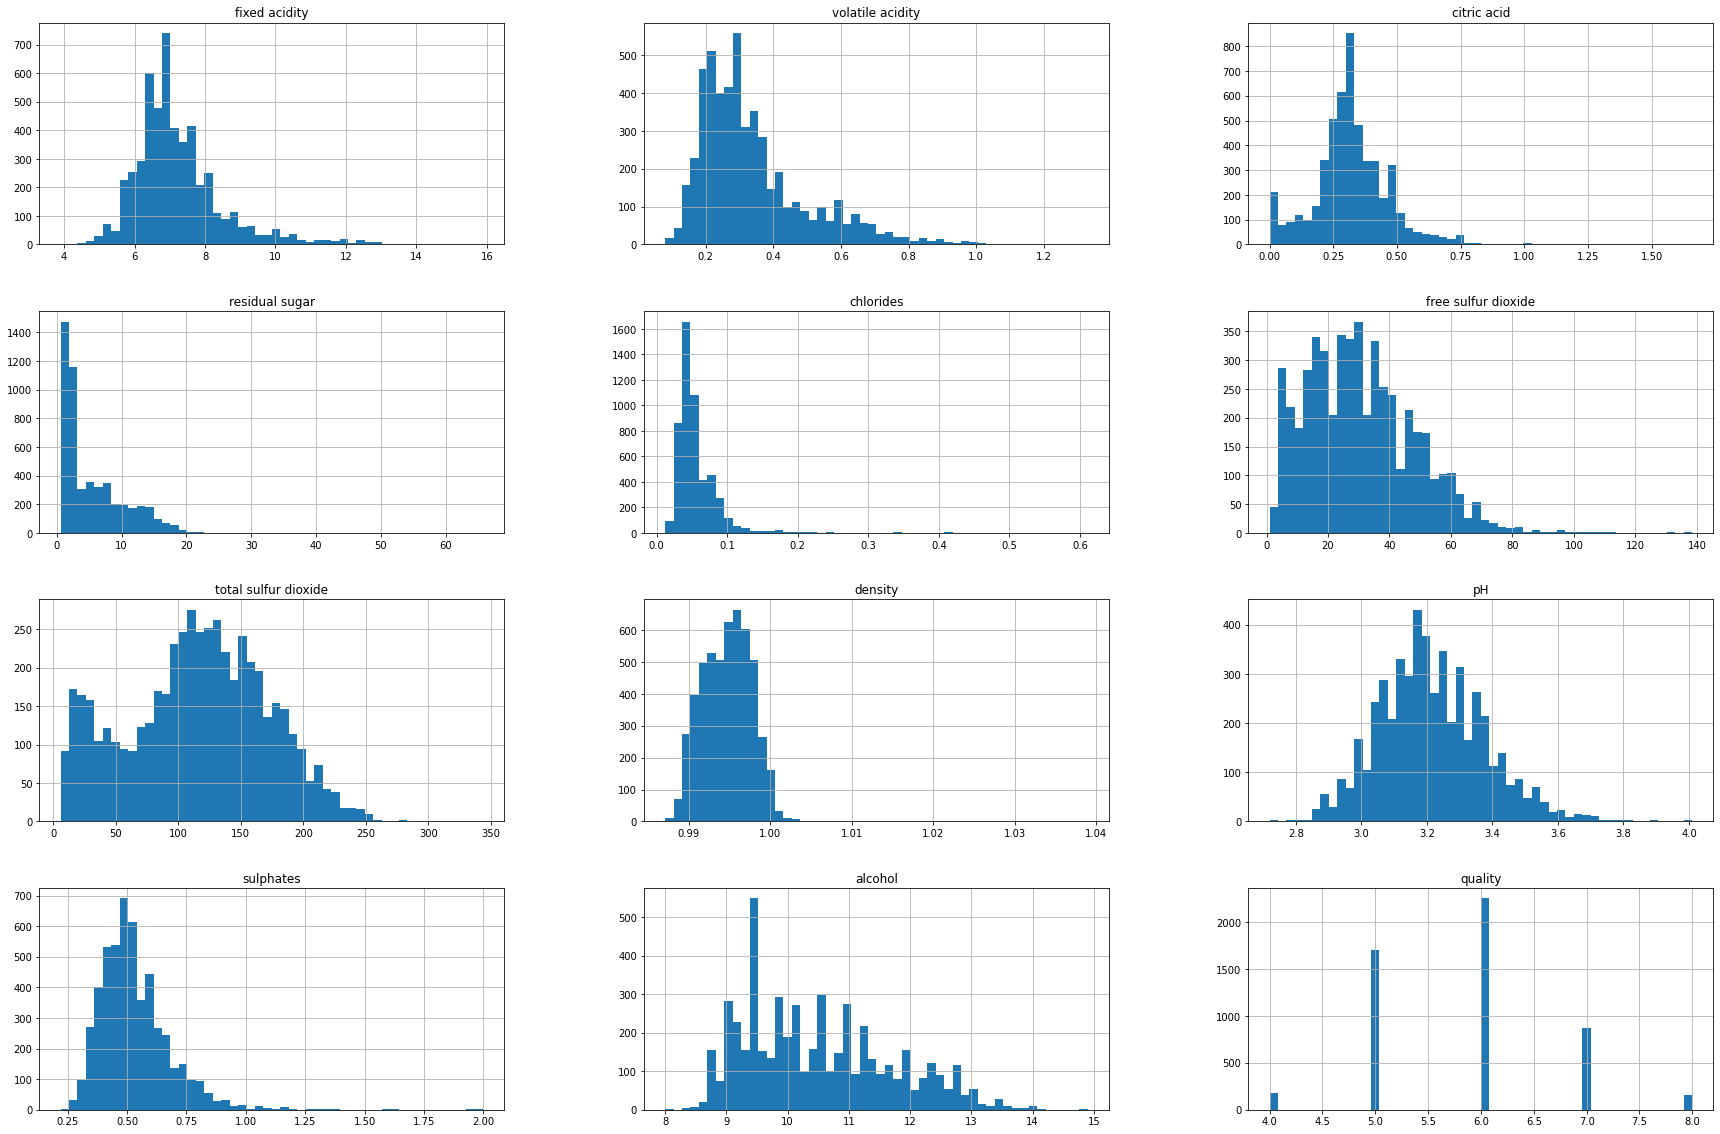

In [18]:
df_train.hist(bins = 50, figsize = (30, 20))

<AxesSubplot:>

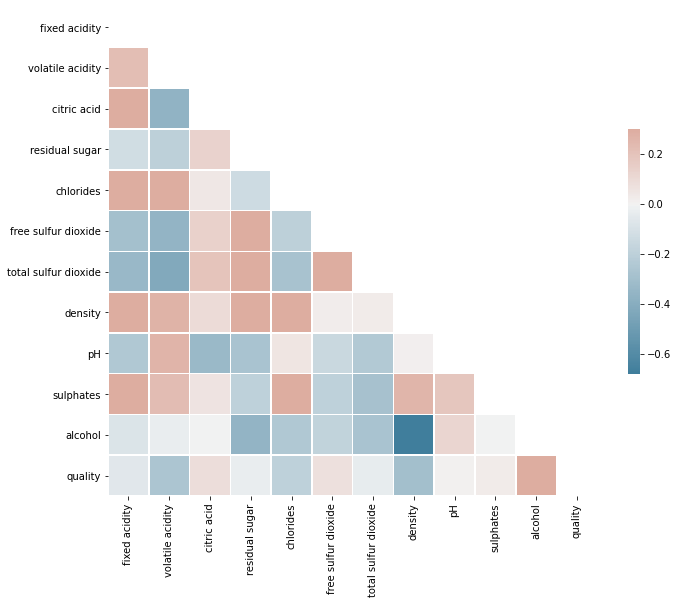

In [19]:
corr = df_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5})

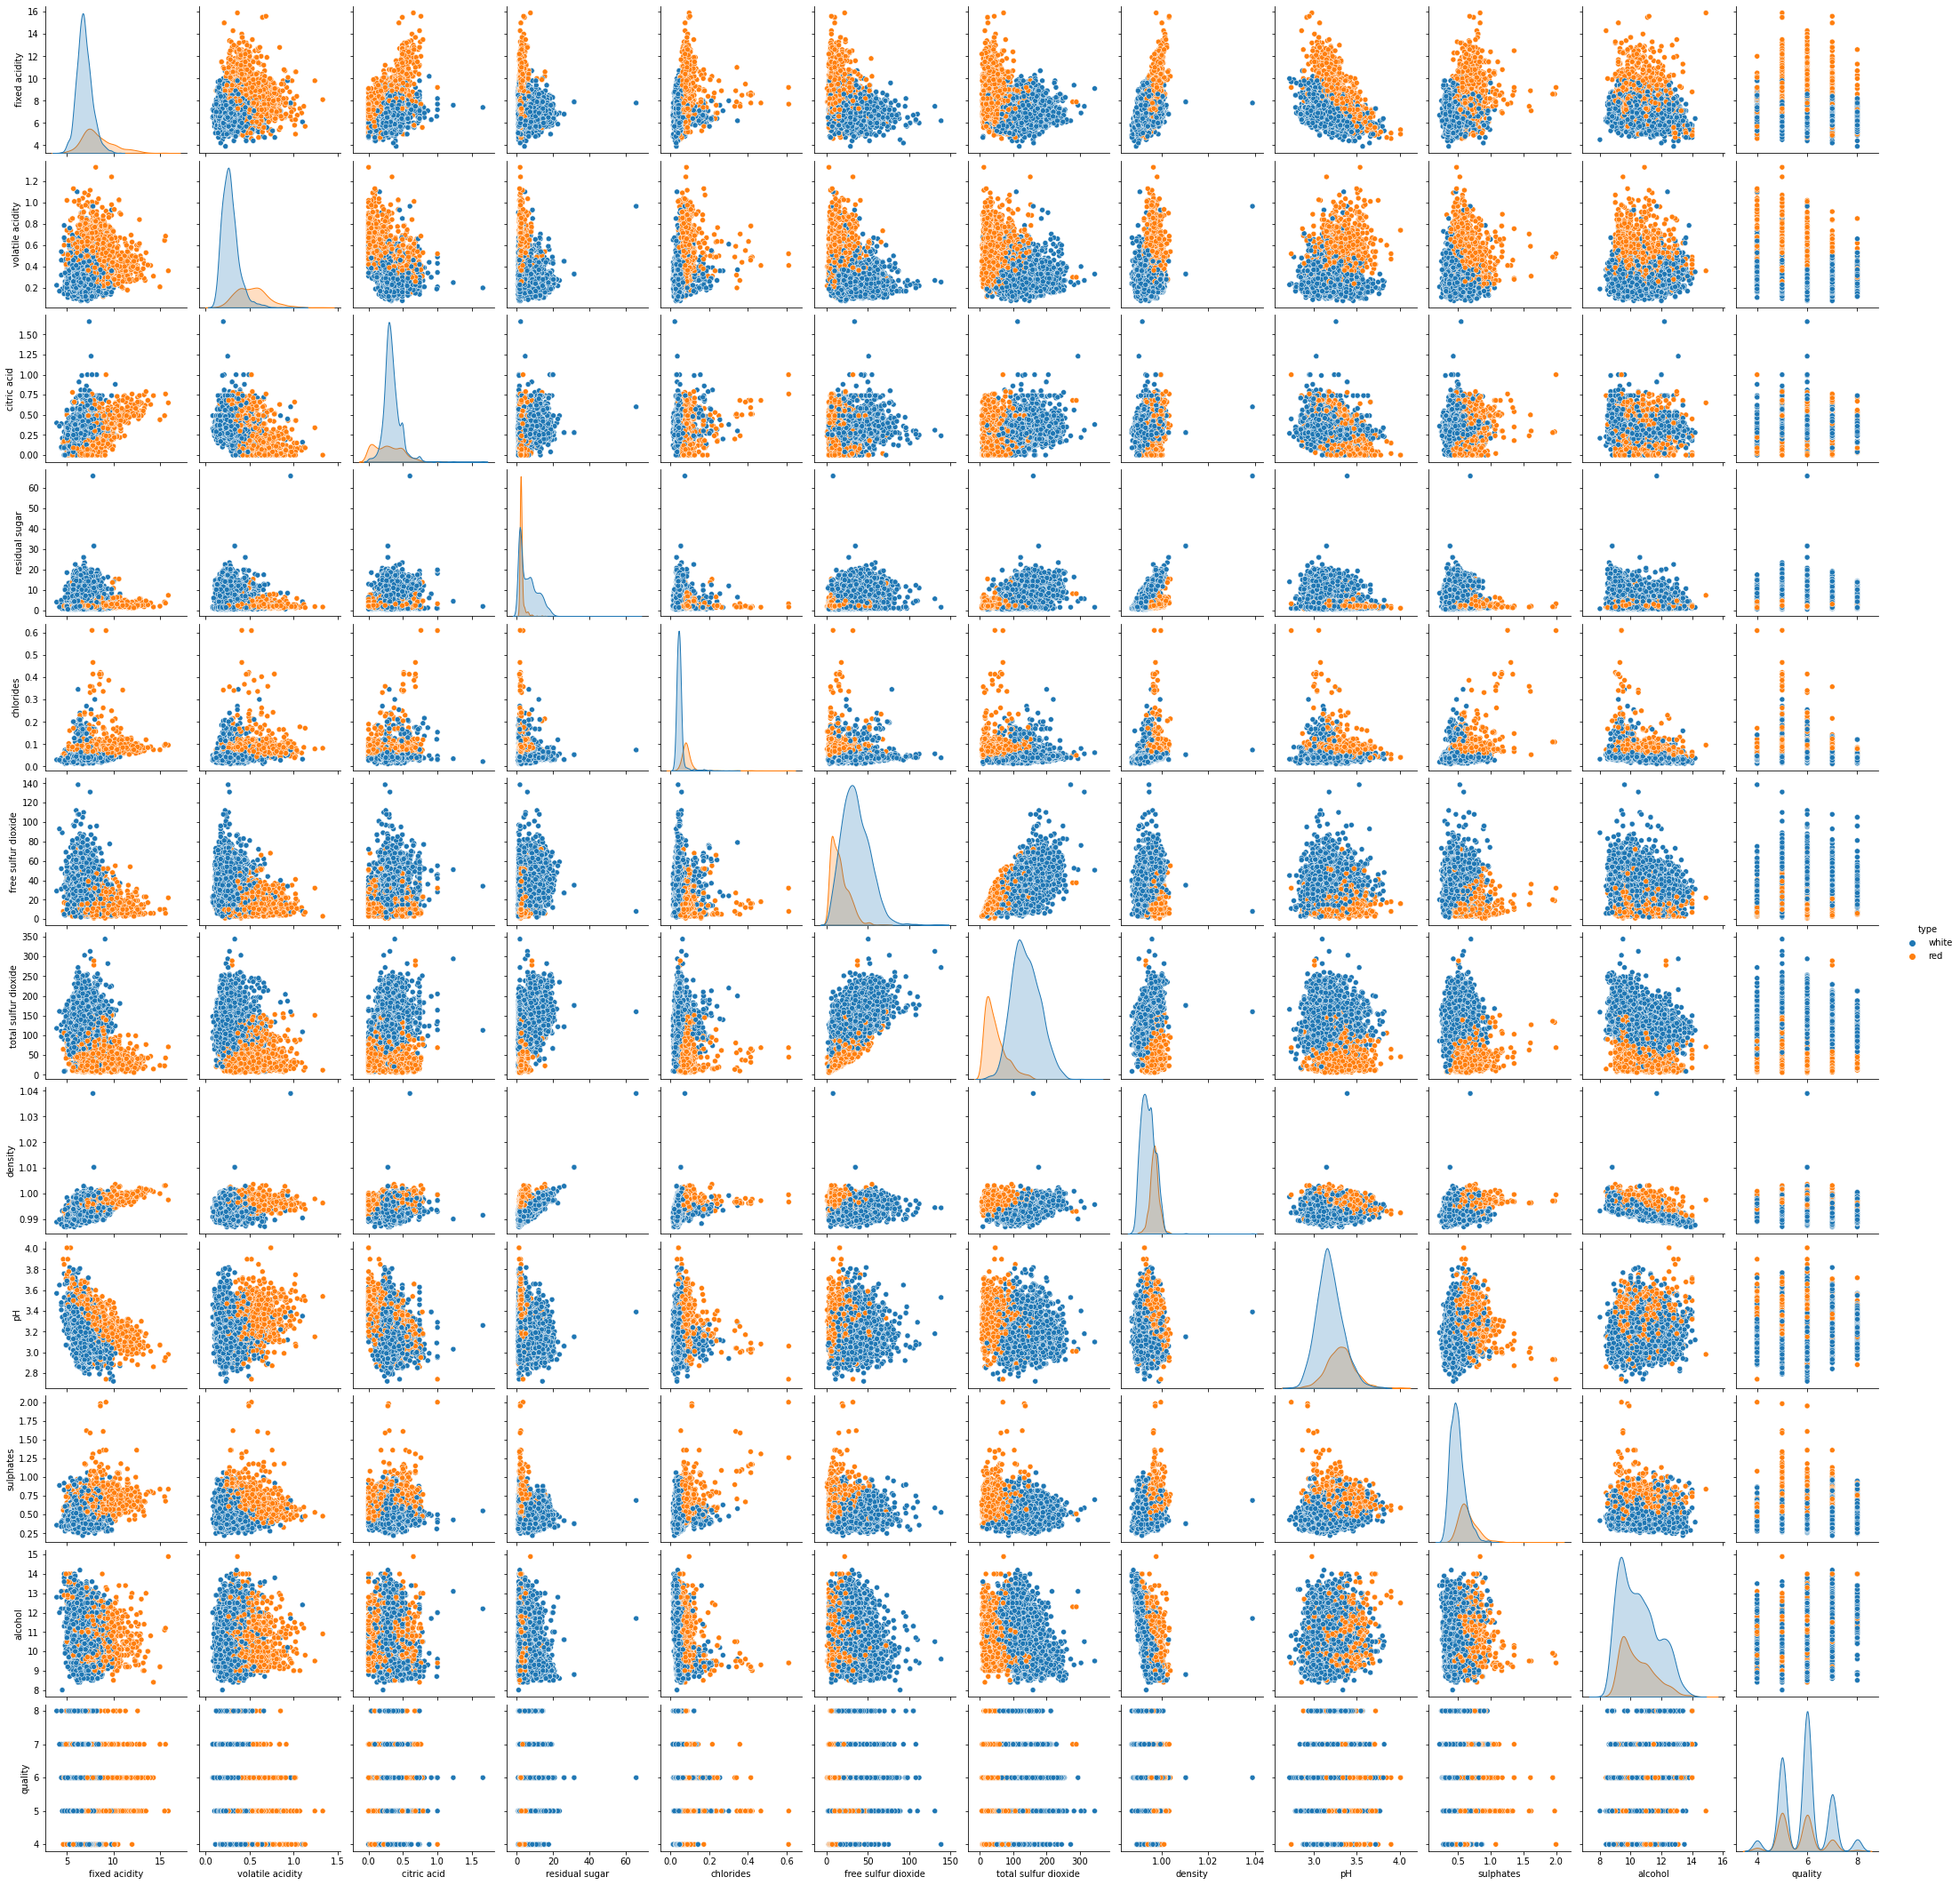

In [20]:
sns.pairplot(df_train, hue = 'type')

In [21]:
df_train.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

<AxesSubplot:xlabel='type', ylabel='sulphates'>

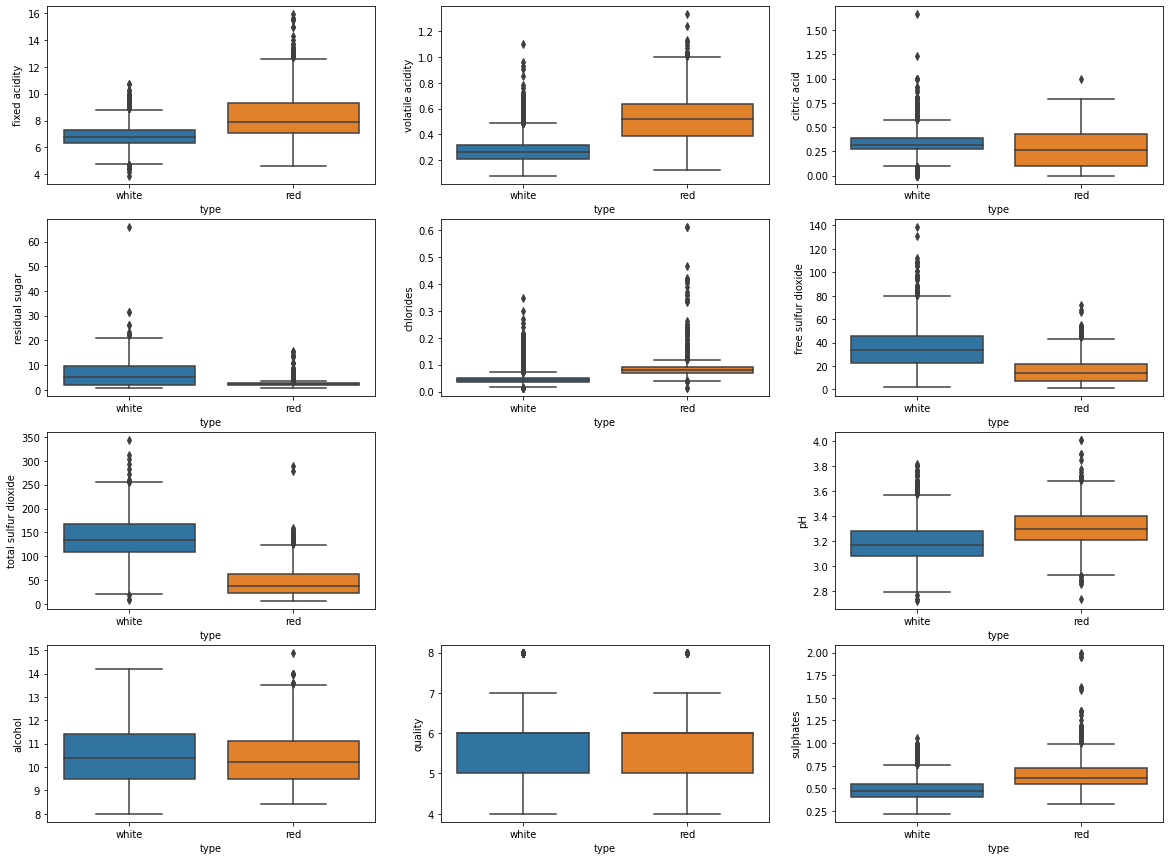

In [22]:
x = df_train['type']

fig, axes = plt.subplots(4,3, figsize=(20,15))
fig.delaxes(axes[2][1])
sns.boxplot(y=df_train['fixed acidity'], x = x, ax=axes[0][0])
sns.boxplot(y=df_train['volatile acidity'], x = x, ax=axes[0][1])
sns.boxplot(y=df_train['citric acid'], x = x, ax=axes[0][2])
sns.boxplot(y=df_train['residual sugar'], x = x, ax=axes[1][0])
sns.boxplot(y=df_train['chlorides'], x = x, ax=axes[1][1])
sns.boxplot(y=df_train['free sulfur dioxide'], x = x, ax=axes[1][2])
sns.boxplot(y=df_train['total sulfur dioxide'], x = x, ax=axes[2][0])
sns.boxplot(y=df_train['density'], x = x, ax=axes[2][1])
sns.boxplot(y=df_train['pH'], x = x, ax=axes[2][2])
sns.boxplot(y=df_train['alcohol'], x = x, ax=axes[3][0])
sns.boxplot(y=df_train['quality'], x = x, ax=axes[3][1])
sns.boxplot(y=df_train['sulphates'], x = x, ax=axes[3][2])

### Remove further outliers

In [23]:
def outlier_treatment(datacolumn, threshold):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (threshold * IQR)
    upper_range = Q3 + (threshold * IQR)
    return lower_range,upper_range

In [24]:
a = set()
for i in df_train.drop('type', axis = 1).columns:
    lower, higher = outlier_treatment(df_train[i], 1.5)
    l = df_train.loc[(df_train[i] < lower) | (df_train[i] > higher)].index
    for j in list(l):
        a.add(j)    

In [25]:
len(a) # for threshold 3.0

304

In [26]:
df_train.drop(a, axis = 0, inplace = True)

/Users/sc47/programs/main/venv/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [64]:
df_train.shape

(4865, 13)

### Preprocessing

In [27]:
X_train = df_train.drop('type', axis = 1)
y_train = df_train['type']

X_test = df_test.drop('type', axis = 1)
y_test = df_test['type']

In [28]:
y_test.value_counts() / y_test.shape[0]

white    0.762568
red      0.237432
Name: type, dtype: float64

In [29]:
y_train.value_counts() / y_train.shape[0]

white    0.740596
red      0.259404
Name: type, dtype: float64

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy = 'median')),
    ])

cat_pipeline = Pipeline([
    ('one_hot', OneHotEncoder()),
    ])

num_attribs = list(X_train.select_dtypes(include = np.number))
cat_attribs = list(X_train.select_dtypes(include = 'object'))

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [31]:
X_train_prepared = full_pipeline.fit_transform(X_train)

In [32]:
X_train_prepared.shape

(4865, 12)

In [33]:
X_test_prepared = full_pipeline.transform(X_test)

### A. Naives Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
clf_nb = GaussianNB()

In [36]:
clf_nb.fit(X_train_prepared, y_train)

GaussianNB()

In [37]:
y_pred = clf_nb.predict(X_test_prepared)

In [38]:
clf_nb.predict_proba(X_test_prepared)

array([[3.31831148e-11, 1.00000000e+00],
       [2.11042340e-07, 9.99999789e-01],
       [5.58484847e-07, 9.99999442e-01],
       ...,
       [6.49010634e-20, 1.00000000e+00],
       [1.45633286e-06, 9.99998544e-01],
       [3.11216924e-20, 1.00000000e+00]])

In [39]:
# y_pred = y_pred.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)

In [40]:
from sklearn.metrics import confusion_matrix, classification_report

In [41]:
confusion_matrix(y_pred, y_test)

array([[294,  24],
       [ 13, 962]])

In [42]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         red       0.96      0.92      0.94       318
       white       0.98      0.99      0.98       975

    accuracy                           0.97      1293
   macro avg       0.97      0.96      0.96      1293
weighted avg       0.97      0.97      0.97      1293



In [43]:
y_pred_new = y_pred.reshape(-1, 1)

In [44]:
y_pred_new

array([['white'],
       ['white'],
       ['white'],
       ...,
       ['white'],
       ['white'],
       ['white']], dtype='<U5')

In [45]:
y_test_new = y_test.to_numpy().reshape(-1, 1)

In [46]:
y_test_new

array([['white'],
       ['white'],
       ['white'],
       ...,
       ['white'],
       ['white'],
       ['white']], dtype=object)

In [47]:
print("Accuracy: {}".format(((y_pred == y_test).sum() / len(y_pred)) * 100))

Accuracy: 97.138437741686


#### Comments

1. Good precision as well as recall for both the classes of wine classification.
2. Output probabilities were observed through the predict_proba() function. The model outputs class probabilities and the highest is selected as classification.
3. Confusion matrix is also plotted. White wine shows lower misclassifications. 

#### Classifier comparisons: From sklearn. I found it informative, hence adding it.

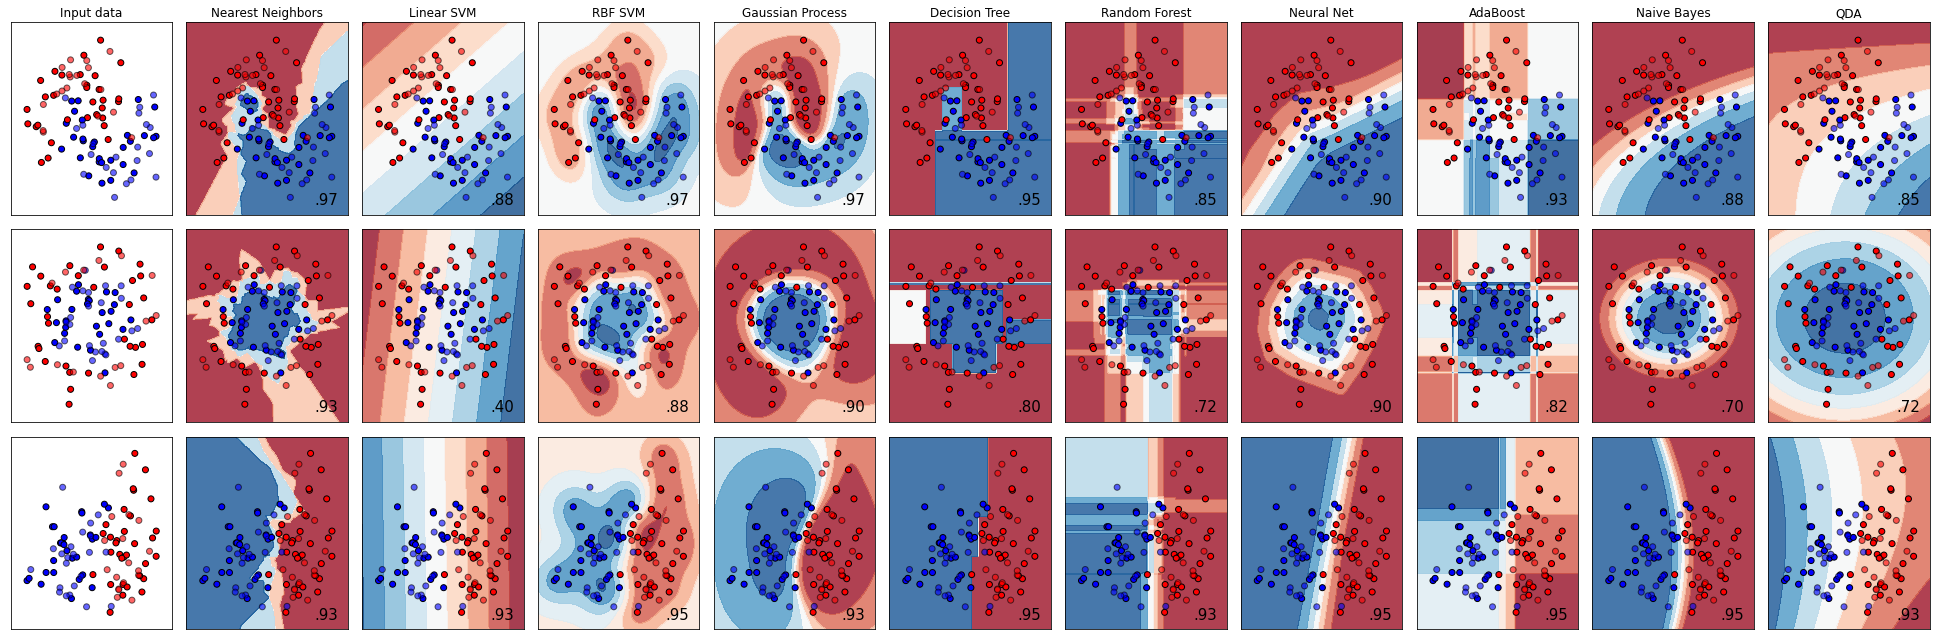

In [105]:
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

## Missing Fish

In [48]:
df = pd.read_csv("Fish_Missing.csv")

In [49]:
df.head()

Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
3   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
4   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555

In [50]:
df.shape

(163, 7)

In [51]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [52]:
df.isnull().sum()

Species     0
Weight      2
Length1     7
Length2    12
Length3    14
Height      6
Width      12
dtype: int64

Dropping duplicates

In [53]:
df.duplicated().sum()

3

In [54]:
df.drop_duplicates(inplace = True)

In [55]:
df.shape

(160, 7)

In [56]:
df.describe(percentiles = [0.005, 0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 0.995])

Weight     Length1     Length2     Length3      Height       Width
count   158.000000  153.000000  148.000000  146.000000  154.000000  148.000000
mean    399.208228   26.725490   28.518919   31.964384    9.142442    4.557105
std     359.522386    9.962756   10.747044   11.540404    4.227363    1.771885
min       0.000000    7.500000    8.400000    8.800000    1.738800    1.047600
0.5%      4.631500    8.868000    9.429000   10.250000    1.917198    1.121688
1%        6.356000    9.664000   10.129000   11.160000    1.975286    1.153852
5%        9.800000   11.460000   12.070000   13.575000    2.376450    1.284290
10%      28.370000   13.800000   14.910000   16.850000    4.739280    2.308950
25%     120.000000   19.800000   21.000000   23.500000    6.111150    3.531750
50%     272.500000   25.400000   27.150000   30.950000    7.806200    4.335000
75%     650.000000   32.800000   36.000000   39.775000   12.371850    5.889375
90%     932.500000   39.640000   41.000000   45.400000   15.459420    6.783990
95%    1000.000000   41.460000   44.650000   48.525000   16.416120    7.393715
99%    1571.500000   56.000000   60.000000   64.000000   18.691236    7.979239
99.5%  1610.750000   56.720000   60.901000   65.100000   19.046963    9.164370
max    1650.000000   59.000000   63.400000   68.000000   20.000000   12.000000

In [57]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [58]:
df['Species'].value_counts()

Perch        56
Bream        36
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [59]:
df.drop(df.loc[df['Weight'].isna()].index, inplace = True)

In [60]:
df.isin([0]).any()

Species    False
Weight      True
Length1    False
Length2    False
Length3    False
Height     False
Width      False
dtype: bool

In [61]:
df['Weight'].isin([0]).value_counts()

False    157
True       1
Name: Weight, dtype: int64

In [62]:
df.loc[df['Weight'].isin([0])]

Species  Weight  Length1  Length2  Length3  Height   Width
43   Roach     0.0     19.0     20.5      NaN  6.4752  3.3516

#### Dropping 1 '0' value in Weight attribute

In [63]:
mask1 = df.loc[df['Weight'].isin([0])]
df.drop(mask1.index, axis = 0, inplace = True)

In [64]:
df.shape

(157, 7)

In [65]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42)

array([[<AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Length1'}>],
       [<AxesSubplot:title={'center':'Length2'}>,
        <AxesSubplot:title={'center':'Length3'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Width'}>]], dtype=object)

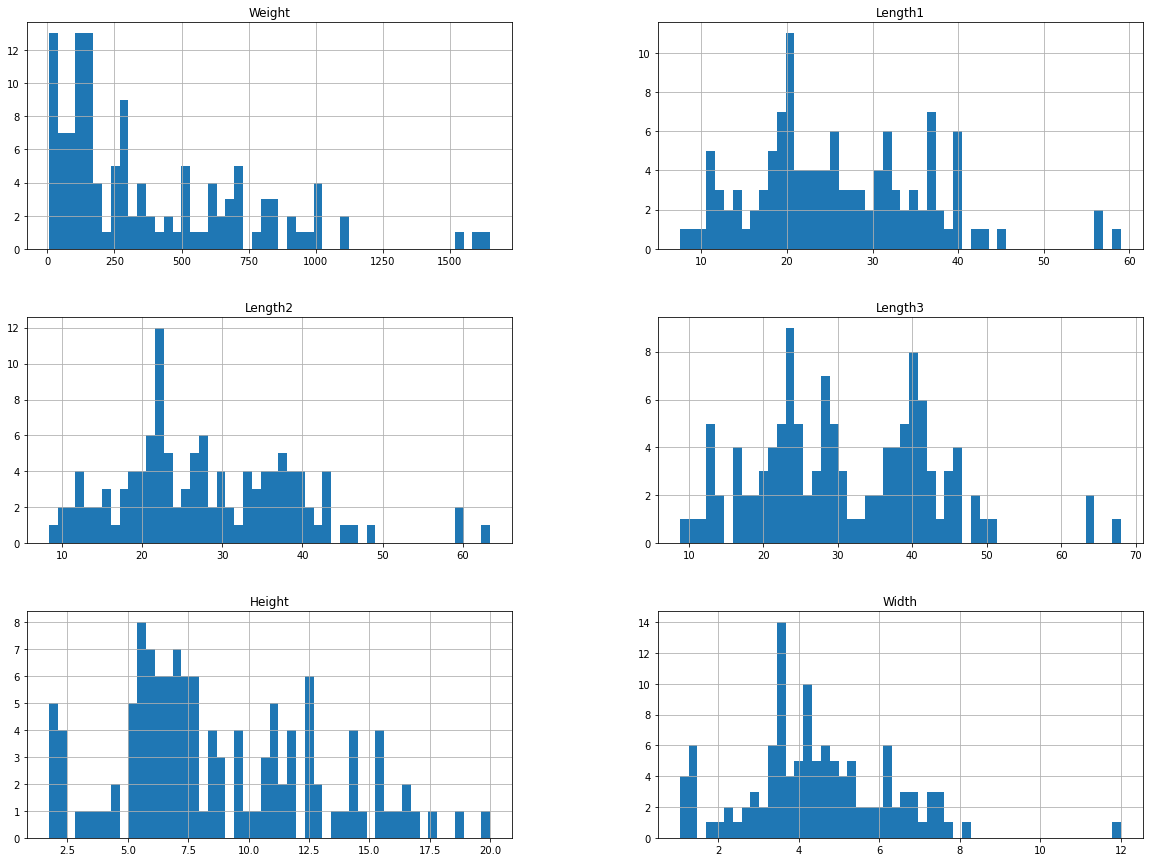

In [66]:
df_train.hist(bins = 50, figsize = (20, 15))

<AxesSubplot:>

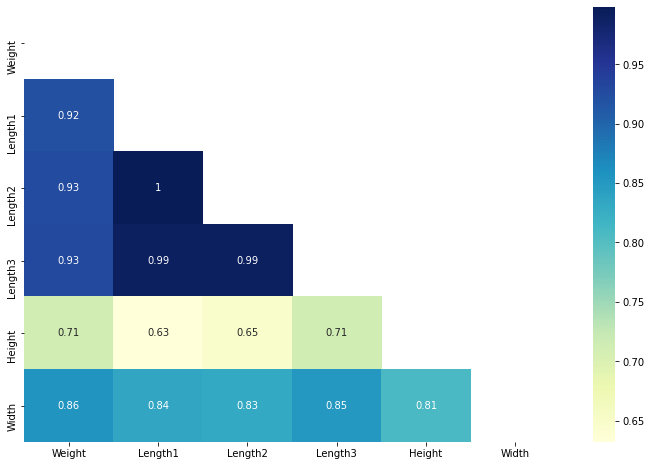

In [67]:
corr_mat = df_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat, mask = np.triu(corr_mat), cmap="YlGnBu", annot = True)

#### Length1 is highly correlated to Length2 and Length3 indicating multi-collinearity. We will thus use just Length1 out of the 3 as our feature variable

In [68]:
target = 'Weight'
features = ['Length1', 'Height', 'Width', 'Species']

In [69]:
df_train['Species'].value_counts()

Perch        46
Bream        25
Roach        17
Pike         12
Smelt        11
Parkki        9
Whitefish     5
Name: Species, dtype: int64

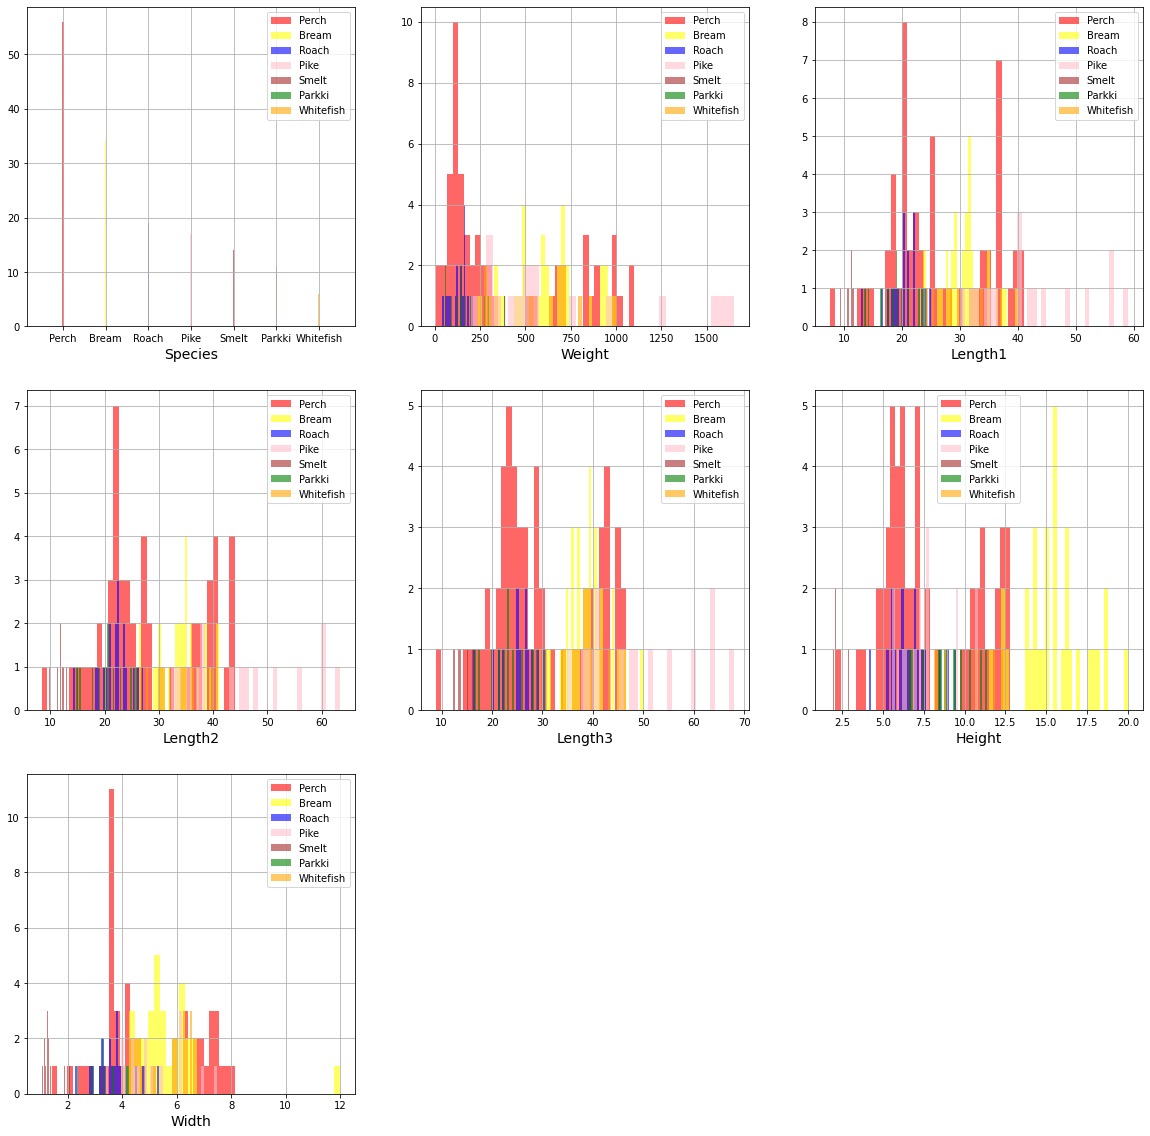

In [70]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(df_train, 1):
    plt.subplot(3, 3, i)
    df[df['Species'] == 'Perch'][column].hist(bins=35, color='red', label='Perch', alpha=0.6)
    df[df['Species'] == 'Bream'][column].hist(bins=35, color='yellow', label='Bream', alpha=0.6)
    df[df['Species'] == 'Roach'][column].hist(bins=35, color='blue', label='Roach', alpha=0.6)
    df[df['Species'] == 'Pike'][column].hist(bins=35, color='pink', label='Pike', alpha=0.6)
    df[df['Species'] == 'Smelt'][column].hist(bins=35, color='brown', label='Smelt', alpha=0.6)
    df[df['Species'] == 'Parkki'][column].hist(bins=35, color='green', label='Parkki', alpha=0.6)
    df[df['Species'] == 'Whitefish'][column].hist(bins=35, color='orange', label='Whitefish', alpha=0.6)
    plt.legend()
    plt.xlabel(column, fontsize = 14)
    print()

<AxesSubplot:>

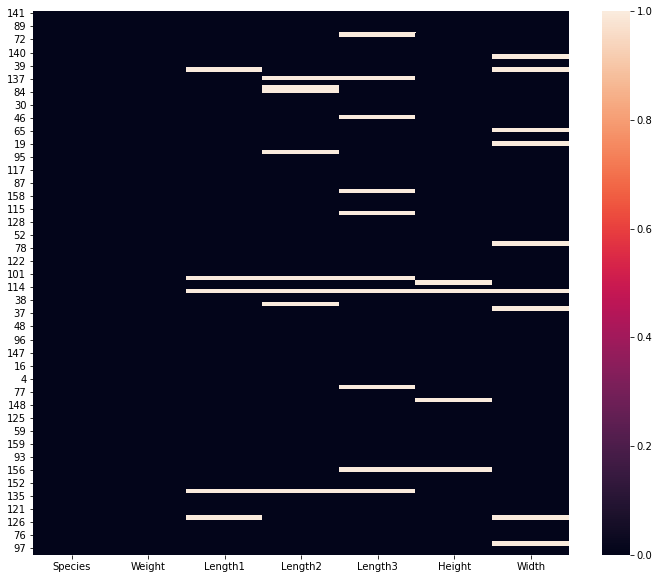

In [71]:
plt.figure(figsize = (12, 10))
sns.heatmap(df_train.isnull())

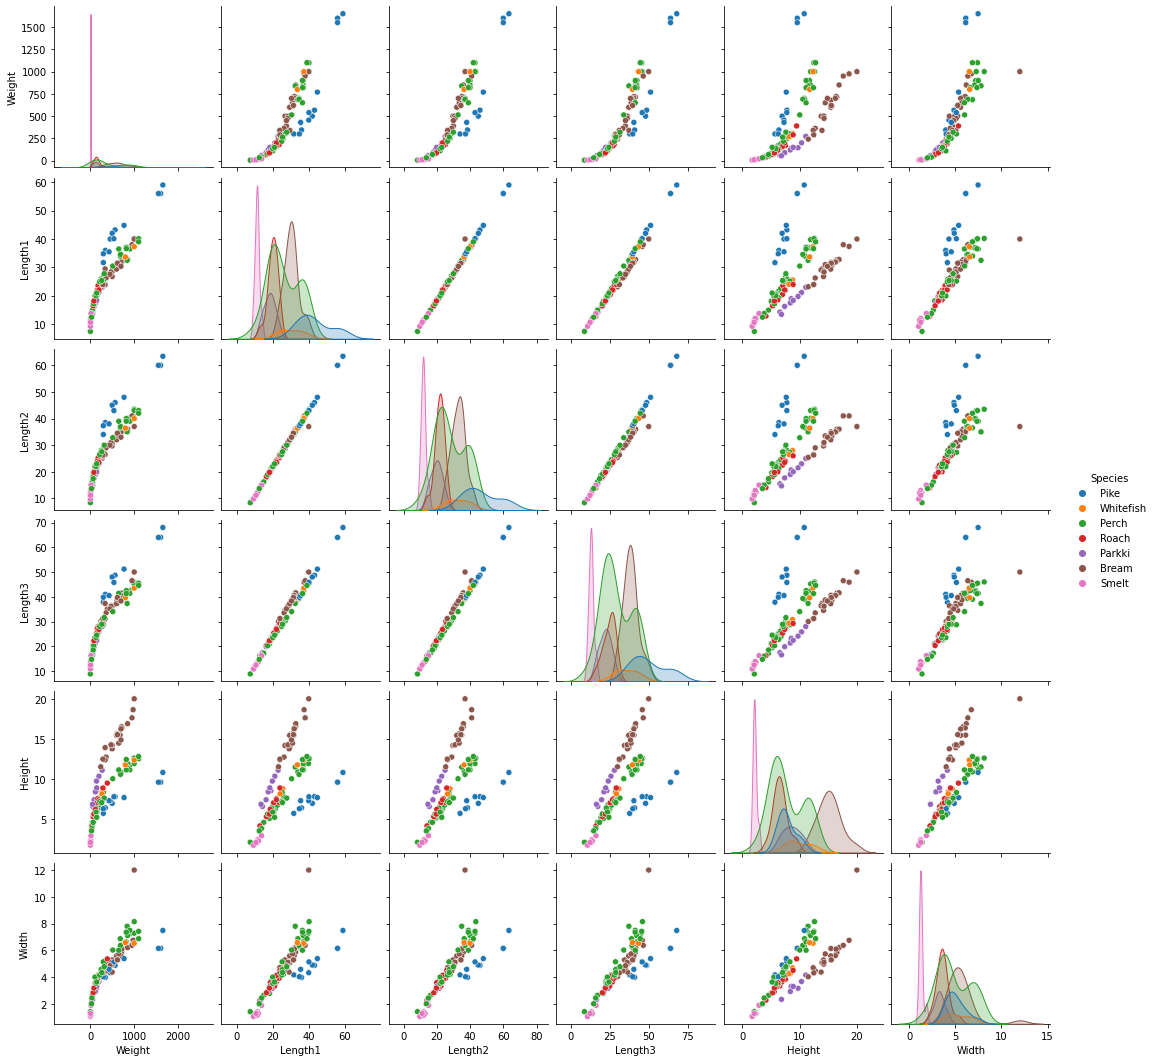

In [72]:
sns.pairplot(df_train, hue = 'Species')

In [73]:
df_train.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

<AxesSubplot:xlabel='Species', ylabel='Width'>

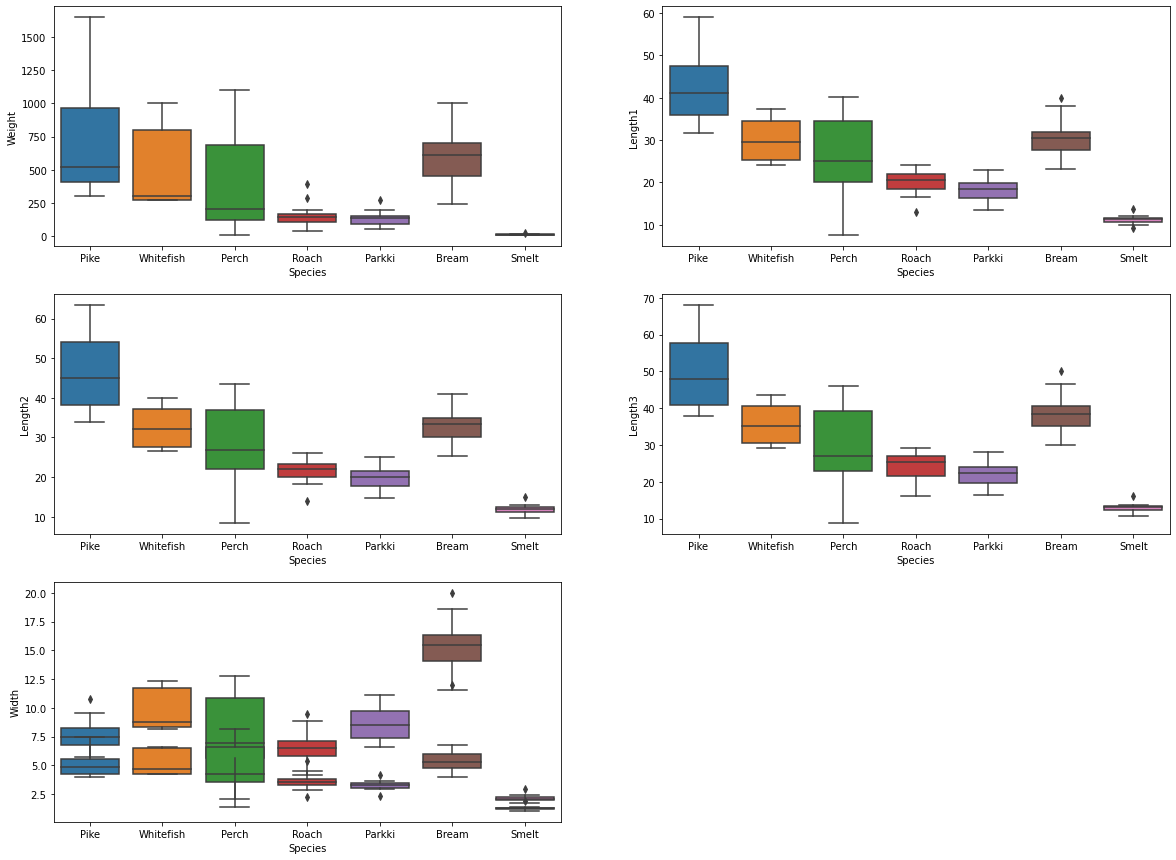

In [74]:
x = df_train['Species']

fig, axes = plt.subplots(3,2, figsize=(20,15))
fig.delaxes(axes[2][1])
sns.boxplot(y=df_train['Weight'], x = x, ax=axes[0][0])
sns.boxplot(y=df_train['Length1'], x = x, ax=axes[0][1])
sns.boxplot(y=df_train['Length2'], x = x, ax=axes[1][0])
sns.boxplot(y=df_train['Length3'], x = x, ax=axes[1][1])
sns.boxplot(y=df_train['Height'], x = x, ax=axes[2][0])
sns.boxplot(y=df_train['Width'], x = x, ax=axes[2][0])

### Remove outliers

In [75]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [76]:
a = set()
for i in df_train.drop('Species', axis = 1).columns:
    lower, higher = outlier_treatment(df_train[i])
    l = df_train.loc[(df_train[i] < lower) | (df_train[i] > higher)].index
    for j in list(l):
        a.add(j)    

In [77]:
a

{145, 146, 147}

In [78]:
df_train.drop(a, axis = 0, inplace = True)

/Users/sc47/programs/main/venv/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Preprocess and Fit

#### Standard scaling numerical attributes and one hot encoding the categorical attribute - Species, imputing based on it.

In [79]:
# df.loc[df['Species'] == 'Perch']
# X_train.drop('Species', axis = 1).loc[X_train['Species'] == 'Perch']

In [80]:
list(df['Species'].value_counts().index)

['Perch', 'Bream', 'Roach', 'Pike', 'Smelt', 'Parkki', 'Whitefish']

In [81]:
from sklearn.impute import SimpleImputer
imputation = SimpleImputer(strategy = 'median')
species_list = list(df['Species'].value_counts().index)

new_train_df = []
new_test_df = []

def imputer(species):
    train = imputation.fit_transform(df_train.drop('Species', axis = 1).loc[df_train['Species'] == species])
    train = pd.DataFrame(train, columns = df_train.drop('Species', axis = 1).columns)
    train['Species'] = [species for _ in range(train.shape[0])]
    
    test = imputation.fit_transform(df_test.drop('Species', axis = 1).loc[df_test['Species'] == species])
    test = pd.DataFrame(test, columns = df_test.drop('Species', axis = 1).columns)
    test['Species'] = [species for _ in range(test.shape[0])]
    
    new_train_df.append(train)
    new_test_df.append(test)

In [82]:
for species in species_list:
    imputer(species)

In [83]:
imputed_train = pd.concat(new_train_df, ignore_index = True)
imputed_test = pd.concat(new_test_df, ignore_index = True)

In [84]:
X_train = imputed_train.drop('Species', axis = 1)
y_train = imputed_train['Species']

X_test = imputed_test.drop('Species', axis = 1)
y_test = imputed_test['Species']

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
    ('one_hot', OneHotEncoder()),
    ])

num_attribs = ['Length1', 'Height', 'Width', 'Weight']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])

In [86]:
X_train_prepared = full_pipeline.fit_transform(X_train)

In [87]:
X_train_prepared.shape

(122, 4)

In [88]:
X_test_prepared = full_pipeline.transform(X_test)

### A. Naives Bayes

In [89]:
from sklearn.naive_bayes import GaussianNB

In [90]:
clf_nb = GaussianNB()

In [91]:
clf_nb.fit(X_train_prepared, y_train)

GaussianNB()

In [92]:
X_test_prepared

array([[ 0.99827267,  0.44578306,  1.35122266,  1.14340675],
       [-0.35676065, -0.54975353, -0.30460031, -0.67261445],
       [-0.24384121, -0.53458806, -0.38495525, -0.55809059],
       [-0.35676065, -0.33391012, -0.36252401, -0.41084563],
       [ 1.80000071,  0.88774478,  1.83675961,  2.12503984],
       [ 0.77243378,  0.3628785 ,  1.15059084,  0.67222287],
       [ 1.33703099,  0.86235144,  1.76100448,  2.17412149],
       [-0.69551898, -0.65732255, -0.59847794, -0.77077776],
       [-0.18738149, -0.50602055, -0.06949821, -0.50246472],
       [-0.18738149, -0.82075692, -0.06949821, -0.81985942],
       [ 1.11119211,  2.1922337 ,  1.10447903,  1.86327102],
       [ 0.70468211,  1.71180577,  0.57300063,  1.0943251 ],
       [ 0.59176267,  1.46360936,  0.82340708,  1.14340675],
       [ 0.74984989,  1.79795503,  0.96074873,  1.22520951],
       [ 1.11119211,  2.20330802,  1.09635835,  1.97779488],
       [ 0.69339017,  1.50840039,  0.68606543,  0.73439297],
       [ 0.47884323,  1.

In [93]:
y_pred = clf_nb.predict(X_test_prepared)

In [94]:
clf_nb.predict_proba(X_test_prepared)[0]

array([2.38592979e-01, 3.24745154e-34, 3.98195746e-01, 4.50432578e-10,
       9.73561195e-22, 0.00000000e+00, 3.63211275e-01])

In [95]:
from sklearn.metrics import confusion_matrix, classification_report

In [96]:
confusion_matrix(y_pred, y_test)

array([[9, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 3, 3, 1, 1, 1],
       [0, 0, 0, 2, 0, 0, 0],
       [0, 0, 6, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [97]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       Bream       1.00      0.90      0.95        10
      Parkki       0.50      1.00      0.67         1
       Perch       0.30      0.30      0.30        10
        Pike       0.40      1.00      0.57         2
       Roach       0.50      0.14      0.22         7
       Smelt       0.67      1.00      0.80         2
   Whitefish       0.00      0.00      0.00         0

    accuracy                           0.56        32
   macro avg       0.48      0.62      0.50        32
weighted avg       0.60      0.56      0.54        32



/Users/sc47/programs/main/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
print("Accuracy: {}".format(((y_pred == y_test).sum() / len(y_pred)) * 100))

Accuracy: 56.25


#### With PCA

In [99]:
from sklearn.decomposition import PCA

In [100]:
pca = PCA(n_components = 3)

In [101]:
X_train_pca = pca.fit_transform(X_train)

In [102]:
X_train_pca.shape

(122, 3)

In [103]:
pca.components_

array([[ 0.99874446,  0.02568711,  0.02747909,  0.03069581,  0.01119983,
         0.00518815],
       [-0.04886253,  0.54244634,  0.5863244 ,  0.59861022,  0.02068939,
         0.02873779],
       [-0.01038834, -0.2092091 , -0.14251437,  0.29307914,  0.91905937,
         0.07244161]])

In [104]:
pca.explained_variance_ratio_

array([9.99330354e-01, 5.65114238e-04, 7.84854751e-05])

### Prediction using Linear Regression

In [ ]:
k_value = np.arange(1, 11, 1)

In [ ]:
k_value

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

#### Using cross-validation

In [ ]:
c_list = []
train_r2_scores = []
test_r2_scores = []
train_rmse_scores = []
test_rmse_scores = []

for i in k_value:
    lin_reg = LinearRegression()
    scores = cross_validate(lin_reg, X_train_prepared, y_train, cv=5,
                         scoring=('r2', 'neg_mean_squared_error'),
                         return_train_score=True)
    #     print(scores['train_r2'].mean(), scores['test_r2'].mean())
    train_r2_scores.append(scores['train_r2'].mean())
    test_r2_scores.append(scores['test_r2'].mean())

In [ ]:
train_r2_scores

In [ ]:
test_r2_scores

In [ ]:
x = k_value
# k_value = np.arange(1, 13, 1)
y = train_r2_scores
z = test_r2_scores

plt.figure(figsize = (14, 8))

plt.plot(x, y, label = "Training",marker='o', markerfacecolor='Black', markersize=8 , color='blue')
plt.plot(x, z, label = "Validation",marker='o', markerfacecolor='Black', markersize=8 , color='red')

plt.title('R2 scores for Training and Validation Sets', fontsize = 20)
plt.xlabel('Iterations', fontsize = 20)
plt.ylabel('R2 scores', fontsize = 20)
plt.legend(fontsize = 26)
plt.tick_params(axis='both', labelsize=20)
# plt.ylim(0.90, 1.00)

In [ ]:
import statistics
statistics.mean(test_r2_scores)

### B. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# no penalty (no regularisation)
log_reg_no_reg = LogisticRegression(solver="lbfgs", random_state=42, penalty = 'none', 
                              max_iter = 2000) 

In [ ]:
from sklearn.model_selection import cross_validate

scores_no_reg = cross_validate(log_reg_no_reg, X_train_prepared, y_train, cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)

In [ ]:
scores_no_reg

l2 regularisation

In [ ]:
log_reg_l2 = LogisticRegression(solver="lbfgs", random_state=42, penalty = 'l2', 
                              max_iter = 2000) 

In [ ]:
scores_l2 = cross_validate(log_reg_l2, X_train_prepared, y_train, cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)

In [ ]:
scores_l2

l1 regularisation

In [ ]:
log_reg_l1 = LogisticRegression(solver="saga", random_state=42, penalty = 'l1', 
                              max_iter = 2000) 

In [ ]:
scores_l1 = cross_validate(log_reg_l1, X_train_prepared, y_train, cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)

In [ ]:
scores_l1

elasticnet

In [ ]:
log_reg_elasticnet = LogisticRegression(solver="saga", random_state=42, penalty = 'elasticnet', 
                              l1_ratio = 0.5, max_iter = 2000) 

In [ ]:
scores_elasticnet = cross_validate(log_reg_elasticnet, X_train_prepared, y_train, cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)

In [ ]:
scores_elasticnet

In [ ]:
scores_elasticnet['test_score'].mean()

different regularisation coefficients

In [ ]:
alphas = np.arange(0.1, 1.1, 0.1)

In [ ]:
alphas

In [ ]:
c_list = []
train_scores = []
test_scores = []

for c in alphas:
    log_reg_various = LogisticRegression(solver="lbfgs", random_state=42, penalty = 'l2', 
                              C = c, max_iter = 2000) 
    scores_various = cross_validate(log_reg_various, X_train_prepared, y_train, cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)
    c_list.append(c)
    train_scores.append(scores_various['train_score'].mean())
    test_scores.append(scores_various['test_score'].mean())
    

plot

In [ ]:
plot_data = pd.DataFrame({
    'method': ['no_reg', 'l2', 'l1', 'elasticnet'],
    'test': [scores_no_reg['test_score'].mean(), scores_l2['test_score'].mean(), 
            scores_l1['test_score'].mean(), scores_elasticnet['test_score'].mean()],
    'train': [scores_no_reg['train_score'].mean(), scores_l2['train_score'].mean(), 
            scores_l1['train_score'].mean(), scores_elasticnet['train_score'].mean()],
    })

In [ ]:
plot_data

In [ ]:
alpha_plot = pd.DataFrame(list(zip(c_list, test_scores,train_scores)), columns = ['method', 'test', 'train'])

In [ ]:
alpha_plot['method'] = round(alpha_plot['method'], 1)

In [ ]:
alpha_plot

### No Regularisation and different Regularisations with default values

In [ ]:
x = plot_data['method']
y = plot_data['test']
z = plot_data['train']
plt.figure(figsize = (14, 7))

plt.plot(x, z, label = "Training",marker='o', markerfacecolor='Black', markersize=8 , color='blue')
plt.plot(x, y, label = "Validation",marker='o', markerfacecolor='Black', markersize=8 , color='red')

plt.title('Accuracy for Training and Validation Sets', fontsize = 20)
plt.xlabel('Regularisation Used', fontsize = 20)
plt.ylabel('Accuracy Percentage', fontsize = 20)
plt.legend(fontsize = 26)
plt.tick_params(axis='both', labelsize=20)

### C values variation: L2.

In [ ]:
alpha_1 = np.linspace(0.0001, 2.0, 50)

In [ ]:
c_list1 = []
train_scores1 = []
test_scores1 = []

for c in alpha_1:
    log_reg_various = LogisticRegression(solver="lbfgs", random_state=42, penalty = 'l2', 
                              C = c, max_iter = 2000) 
    scores_various = cross_validate(log_reg_various, X_train_prepared, y_train, cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)
    c_list1.append(c)
    train_scores1.append(scores_various['train_score'].mean())
    test_scores1.append(scores_various['test_score'].mean())

In [ ]:
alpha_plot1 = pd.DataFrame()
alpha_plot1 = pd.DataFrame(list(zip(c_list1, test_scores1,train_scores1)), columns = ['method', 'test', 'train'])

In [ ]:
x = alpha_plot1['method']
y = alpha_plot1['test']
z = alpha_plot1['train']
plt.figure(figsize = (14, 8))

plt.plot(x, z, label = "Training", color='blue')
plt.plot(x, y, label = "Validation", color='red')

plt.title('Accuracy for Training and Validation Sets: L2.', fontsize = 20)
plt.xlabel('Regularisation C Parameter Values - L2', fontsize = 20)
plt.ylabel('Accuracy Percentage', fontsize = 20)
plt.legend(fontsize = 26)
plt.ylim(0.975, 1.00)
# plt.xticks(x)
plt.tick_params(axis='both', labelsize=20)

### C value variation: L1.

In [ ]:
c_list1 = []
train_scores1 = []
test_scores1 = []

for c in alpha_1:
    log_reg_various = LogisticRegression(solver="saga", random_state=42, penalty = 'l1', 
                             C = c, max_iter = 2000) 
    scores_various = cross_validate(log_reg_various, X_train_prepared, y_train, cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)
    c_list1.append(c)
    train_scores1.append(scores_various['train_score'].mean())
    test_scores1.append(scores_various['test_score'].mean())

In [ ]:
alpha_plot1 = pd.DataFrame()
alpha_plot1 = pd.DataFrame(list(zip(c_list1, test_scores1,train_scores1)), columns = ['method', 'test', 'train'])

In [ ]:
x = alpha_plot1['method']
y = alpha_plot1['test']
z = alpha_plot1['train']
plt.figure(figsize = (14, 8))

plt.plot(x, z, label = "Training", color='blue')
plt.plot(x, y, label = "Validation", color='red')

plt.title('Accuracy for Training and Validation Sets: L1.', fontsize = 20)
plt.xlabel('Regularisation C Parameter Values - L1', fontsize = 20)
plt.ylabel('Accuracy Percentage', fontsize = 20)
plt.legend(fontsize = 26)
plt.ylim(0.975, 1.00)
# plt.xticks(x)
plt.tick_params(axis='both', labelsize=20)

### C value variation: ElasticNet.

In [ ]:
c_list1 = []
train_scores1 = []
test_scores1 = []

for c in alpha_1:
    log_reg_various = LogisticRegression(solver="saga", random_state=42, penalty = 'elasticnet', 
                             C = c, max_iter = 2000, l1_ratio = 0.5) 
    scores_various = cross_validate(log_reg_various, X_train_prepared, y_train, cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)
    c_list1.append(c)
    train_scores1.append(scores_various['train_score'].mean())
    test_scores1.append(scores_various['test_score'].mean())

In [ ]:
alpha_plot1 = pd.DataFrame()
alpha_plot1 = pd.DataFrame(list(zip(c_list1, test_scores1,train_scores1)), columns = ['method', 'test', 'train'])

In [ ]:
x = alpha_plot1['method']
y = alpha_plot1['test']
z = alpha_plot1['train']
plt.figure(figsize = (14, 8))

plt.plot(x, z, label = "Training", color='blue')
plt.plot(x, y, label = "Validation", color='red')

plt.title('Accuracy for Training and Validation Sets: ElasticNet', fontsize = 20)
plt.xlabel('Regularisation C Parameter Values - ElasticNet', fontsize = 20)
plt.ylabel('Accuracy Percentage', fontsize = 20)
plt.legend(fontsize = 26)
plt.ylim(0.975, 1.00)
# plt.xticks(x)
plt.tick_params(axis='both', labelsize=20)

### B. Predicting quality of wine(Low/Medium/High), studying the effect of regularisation on Training and Validation sets

In [ ]:
wine_df['quality_cat'] = pd.cut(wine_df['quality'],
                               bins = [0, 4.5, 6.5, np.inf],
                               labels = [1, 2, 3])

In [ ]:
wine_df['quality_cat'].value_counts()

### Preprocessing

In [ ]:
y_wine = wine_df['quality_cat']
X_wine = wine_df.drop(['quality', 'quality_cat'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size = 0.2, random_state = 42)

In [ ]:
y_test.value_counts() / y_test.shape[0]

In [ ]:
y_train.value_counts() / y_train.shape[0]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
    ('one_hot', OneHotEncoder()),
    ])

num_attribs = list(X_train.select_dtypes(include = np.number))
cat_attribs = list(X_train.select_dtypes(include = 'object'))

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [ ]:
X_train_prepared = full_pipeline.fit_transform(X_train)

In [ ]:
X_train_prepared.shape

In [ ]:
X_test_prepared = full_pipeline.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

# no penalty (no regularisation)
log_reg_no_reg = LogisticRegression(solver="lbfgs", random_state=42, penalty = 'none', 
                              max_iter = 2000) 

In [ ]:
from sklearn.model_selection import cross_validate

scores_no_reg = cross_validate(log_reg_no_reg, X_train_prepared, y_train, cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)

In [ ]:
scores_no_reg

l2 regularisation

In [ ]:
log_reg_l2 = LogisticRegression(solver="lbfgs", random_state=42, penalty = 'l2', 
                              max_iter = 2000) 

In [ ]:
scores_l2 = cross_validate(log_reg_l2, X_train_prepared, y_train, cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)

In [ ]:
scores_l2

l1 regularisation

In [ ]:
log_reg_l1 = LogisticRegression(solver="saga", random_state=42, penalty = 'l1', 
                              max_iter = 2000) 

In [ ]:
scores_l1 = cross_validate(log_reg_l1, X_train_prepared, y_train, cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)

In [ ]:
scores_l1

elasticnet

In [ ]:
log_reg_elasticnet = LogisticRegression(solver="saga", random_state=42, penalty = 'elasticnet', 
                              l1_ratio = 0.5, max_iter = 2000) 

In [ ]:
scores_elasticnet = cross_validate(log_reg_elasticnet, X_train_prepared, y_train, cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)

In [ ]:
scores_elasticnet

In [ ]:
scores_elasticnet['test_score'].mean()

different regularisation coefficients

In [ ]:
alphas = np.arange(0.1, 1.1, 0.1)

In [ ]:
alphas

In [ ]:
c_list = []
train_scores = []
test_scores = []

for c in alphas:
    log_reg_various = LogisticRegression(solver="lbfgs", random_state=42, penalty = 'l2', 
                              C = c, max_iter = 2000) 
    scores_various = cross_validate(log_reg_various, X_train_prepared, y_train, cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)
    c_list.append(c)
    train_scores.append(scores_various['train_score'].mean())
    test_scores.append(scores_various['test_score'].mean())
    

plot

In [ ]:
plot_data = pd.DataFrame({
    'method': ['no_reg', 'l2', 'l1', 'elasticnet'],
    'test': [scores_no_reg['test_score'].mean(), scores_l2['test_score'].mean(), 
            scores_l1['test_score'].mean(), scores_elasticnet['test_score'].mean()],
    'train': [scores_no_reg['train_score'].mean(), scores_l2['train_score'].mean(), 
            scores_l1['train_score'].mean(), scores_elasticnet['train_score'].mean()],
    })

In [ ]:
plot_data

In [ ]:
alpha_plot = pd.DataFrame(list(zip(c_list, test_scores,train_scores)), columns = ['method', 'test', 'train'])

In [ ]:
alpha_plot['method'] = round(alpha_plot['method'], 1)

In [ ]:
alpha_plot

### No Regularisation and different Regularisations with default values

In [ ]:
x = plot_data['method']
y = plot_data['test']
z = plot_data['train']
plt.figure(figsize = (14, 7))

plt.plot(x, z, label = "Training",marker='o', markerfacecolor='Black', markersize=8 , color='blue')
plt.plot(x, y, label = "Validation",marker='o', markerfacecolor='Black', markersize=8 , color='red')

plt.title('Accuracy for Training and Validation Sets', fontsize = 20)
plt.xlabel('Regularisation Used', fontsize = 20)
plt.ylabel('Accuracy Percentage', fontsize = 20)
plt.legend(fontsize = 26)
plt.tick_params(axis='both', labelsize=20)

### C values variation: L2.

In [ ]:
alpha_1 = np.linspace(0.0001, 2.0, 50)

In [ ]:
c_list1 = []
train_scores1 = []
test_scores1 = []

for c in alpha_1:
    log_reg_various = LogisticRegression(solver="lbfgs", random_state=42, penalty = 'l2', 
                              C = c, max_iter = 2000) 
    scores_various = cross_validate(log_reg_various, X_train_prepared, y_train, cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)
    c_list1.append(c)
    train_scores1.append(scores_various['train_score'].mean())
    test_scores1.append(scores_various['test_score'].mean())

In [ ]:
alpha_plot1 = pd.DataFrame()
alpha_plot1 = pd.DataFrame(list(zip(c_list1, test_scores1,train_scores1)), columns = ['method', 'test', 'train'])

In [ ]:
x = alpha_plot1['method']
y = alpha_plot1['test']
z = alpha_plot1['train']
plt.figure(figsize = (14, 8))

plt.plot(x, z, label = "Training", color='blue')
plt.plot(x, y, label = "Validation", color='red')

plt.title('Accuracy for Training and Validation Sets: L2.', fontsize = 20)
plt.xlabel('Regularisation C Parameter Values - L2', fontsize = 20)
plt.ylabel('Accuracy Percentage', fontsize = 20)
plt.legend(fontsize = 26)
# plt.ylim(0.975, 1.00)
# plt.xticks(x)
plt.tick_params(axis='both', labelsize=20)

### C value variation: L1.

In [ ]:
c_list1 = []
train_scores1 = []
test_scores1 = []

for c in alpha_1:
    log_reg_various = LogisticRegression(solver="saga", random_state=42, penalty = 'l1', 
                             C = c, max_iter = 2000) 
    scores_various = cross_validate(log_reg_various, X_train_prepared, y_train, cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)
    c_list1.append(c)
    train_scores1.append(scores_various['train_score'].mean())
    test_scores1.append(scores_various['test_score'].mean())

In [ ]:
alpha_plot1 = pd.DataFrame()
alpha_plot1 = pd.DataFrame(list(zip(c_list1, test_scores1,train_scores1)), columns = ['method', 'test', 'train'])

In [ ]:
x = alpha_plot1['method']
y = alpha_plot1['test']
z = alpha_plot1['train']
plt.figure(figsize = (14, 8))

plt.plot(x, z, label = "Training", color='blue')
plt.plot(x, y, label = "Validation", color='red')

plt.title('Accuracy for Training and Validation Sets: L1.', fontsize = 20)
plt.xlabel('Regularisation C Parameter Values - L1', fontsize = 20)
plt.ylabel('Accuracy Percentage', fontsize = 20)
plt.legend(fontsize = 26)
# plt.ylim(0.975, 1.00)
# plt.xticks(x)
plt.tick_params(axis='both', labelsize=20)

### C value variation: ElasticNet.

In [ ]:
c_list1 = []
train_scores1 = []
test_scores1 = []

for c in alpha_1:
    log_reg_various = LogisticRegression(solver="saga", random_state=42, penalty = 'elasticnet', 
                             C = c, max_iter = 2000, l1_ratio = 0.5) 
    scores_various = cross_validate(log_reg_various, X_train_prepared, y_train, cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)
    c_list1.append(c)
    train_scores1.append(scores_various['train_score'].mean())
    test_scores1.append(scores_various['test_score'].mean())

In [ ]:
alpha_plot1 = pd.DataFrame()
alpha_plot1 = pd.DataFrame(list(zip(c_list1, test_scores1,train_scores1)), columns = ['method', 'test', 'train'])

In [ ]:
x = alpha_plot1['method']
y = alpha_plot1['test']
z = alpha_plot1['train']
plt.figure(figsize = (14, 8))

plt.plot(x, z, label = "Training", color='blue')
plt.plot(x, y, label = "Validation", color='red')

plt.title('Accuracy for Training and Validation Sets: ElasticNet', fontsize = 20)
plt.xlabel('Regularisation C Parameter Values - ElasticNet', fontsize = 20)
plt.ylabel('Accuracy Percentage', fontsize = 20)
plt.legend(fontsize = 26)
# plt.ylim(0.975, 1.00)
# plt.xticks(x)
plt.tick_params(axis='both', labelsize=20)